# Question 1

Download and plot 3 apparently related sets of data with at least. Each set should contain at least two related variables. You should explain how variables in each set of data are related. Plot each set using the scatter plot function and the line graph function. For example, you might the obseved rate of unemployement and the natural rate of unemployment in the same graph. To find data, search for data at FRED and use the code associated with the data. For example, the CPI measure that includes urban items is identified by the code, CPIAUCSL.

In [57]:
import os
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt

start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.today()

In [58]:
def gather_data(data_codes,
               start,
               end = datetime.datetime.today(),
               freq = "M"):
    df_init = False
    #dct.items() calls for key and value that key points to
    for key, code in data_codes.items():
        if df_init == False:
            df = web.DataReader(code, "fred", start, end).resample(freq).mean() # .first() or .Last() or median ... 
            df.rename(columns  = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
    
    return df

In [27]:
data_codes = {"Consumer Price Index for All Urban Consumers: All Items": "CPIAUCSL",
             "Personal Consumption Expenditures Price Index": "PCEPILFE",
             "Producer Price Index by Commodity: All Commodities": "PPIACO",
             "Employment Cost Index: Wages and Salaries: Private Industry Workers": "ECIWAG"}

start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                  freq = "W")

<AxesSubplot:xlabel='DATE'>

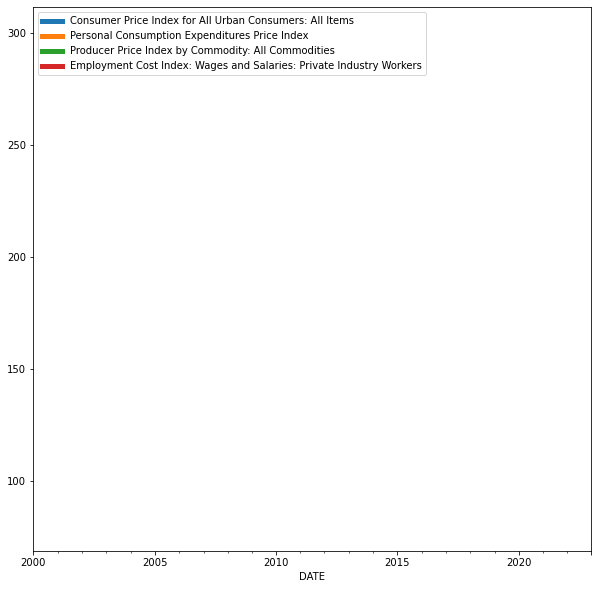

In [17]:
plot_data = data[["Consumer Price Index for All Urban Consumers: All Items",
                "Personal Consumption Expenditures Price Index",
                "Producer Price Index by Commodity: All Commodities",
                "Employment Cost Index: Wages and Salaries: Private Industry Workers"]]

plot_data = plot_data.fillna(0)
plot_data.sum(axis = 1)

fig, ax =plt.subplots(figsize = (10, 10))
plot_data = data[["Consumer Price Index for All Urban Consumers: All Items",
                "Personal Consumption Expenditures Price Index",
                "Producer Price Index by Commodity: All Commodities",
                "Employment Cost Index: Wages and Salaries: Private Industry Workers"]]

plot_data.plot.line(ax = ax, linewidth = 5)

C:\Users\Owner\AppData\Local\Temp/ipykernel_13408/2193167120.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


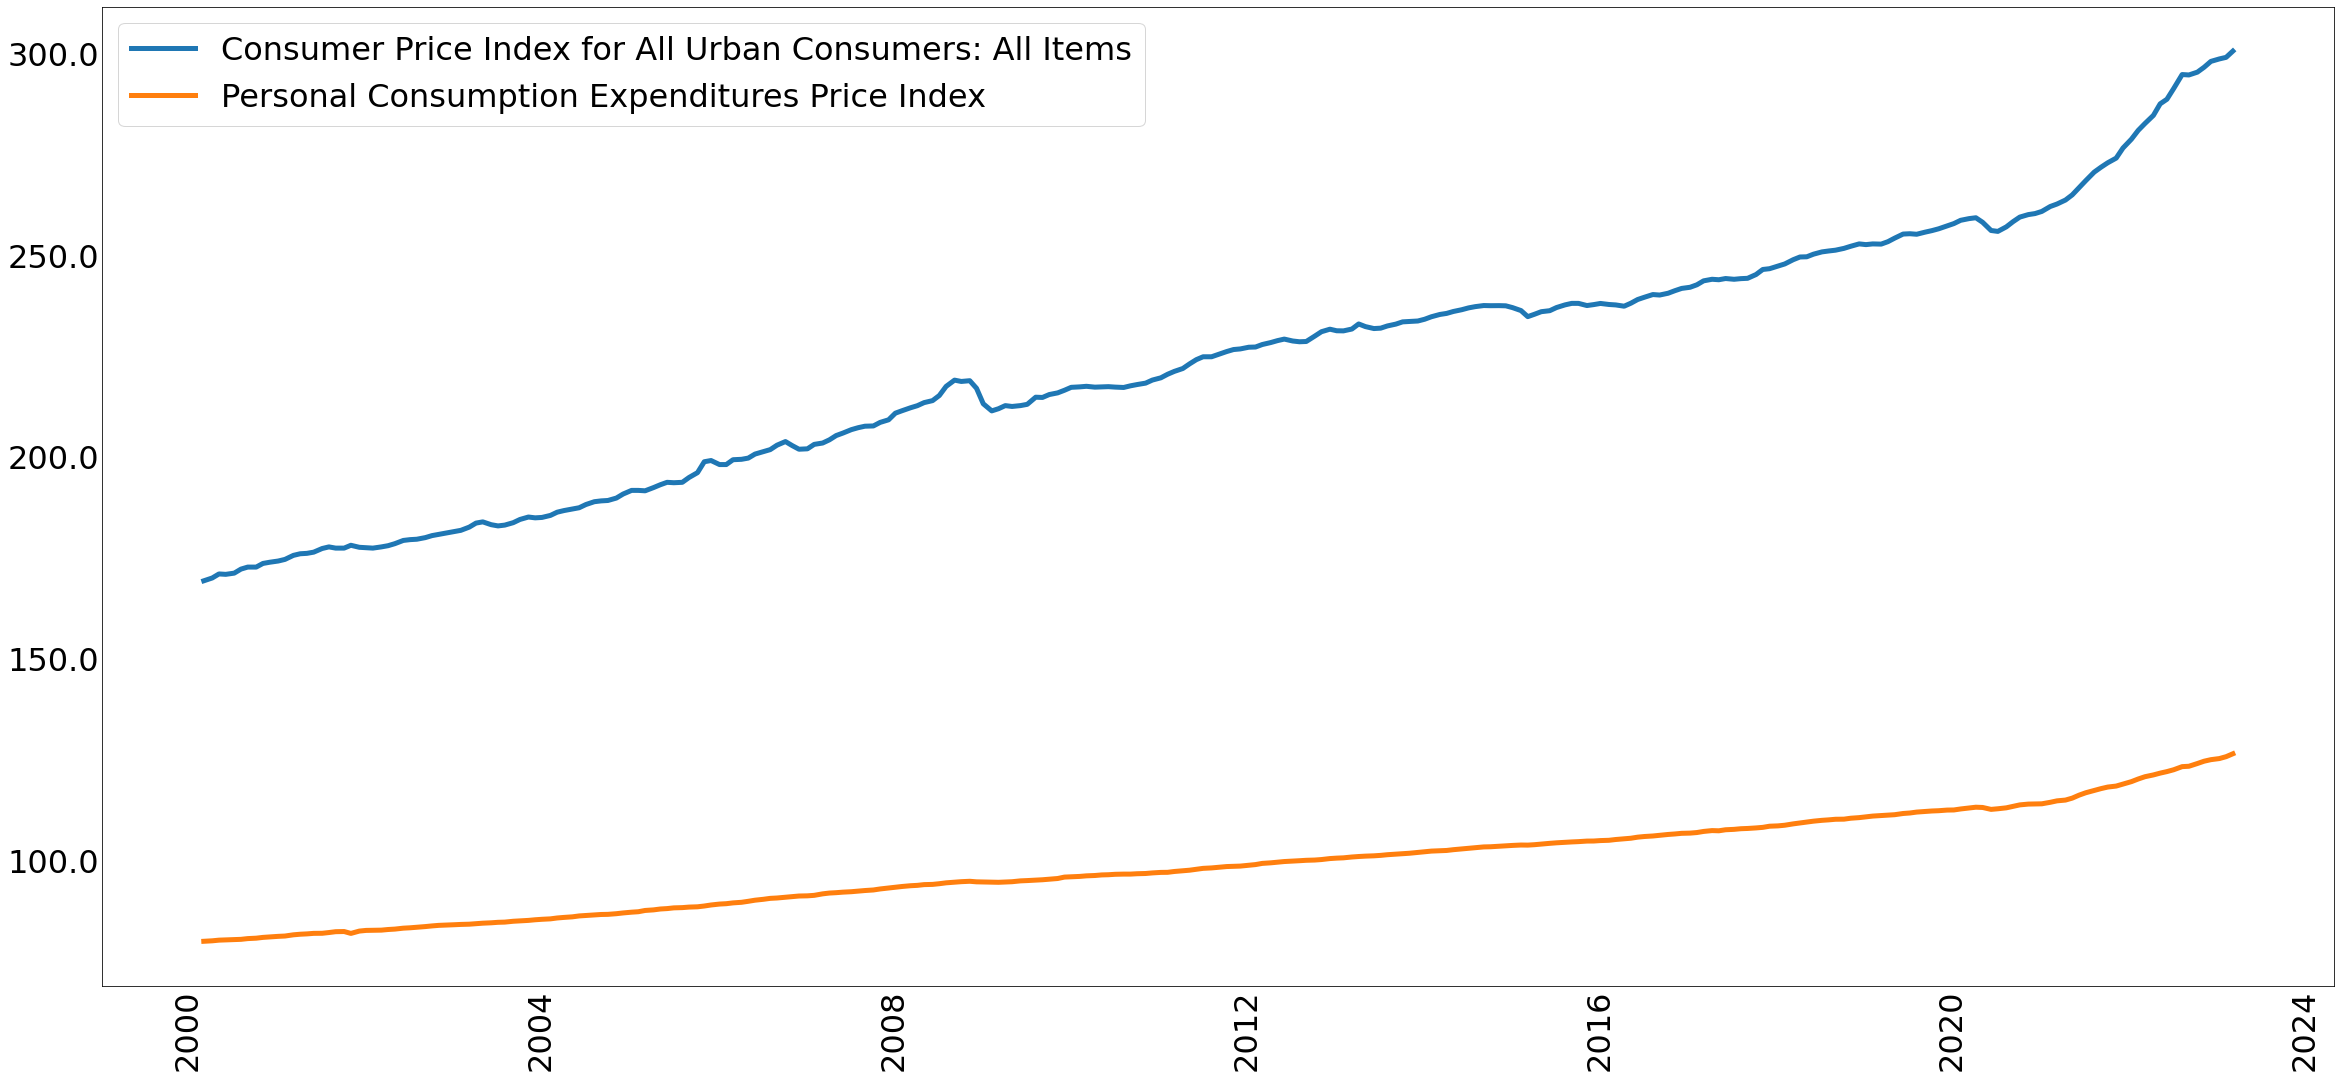

In [51]:
import os
def plot_lines(df,
              linewidth = 5,
              figsize = (40, 20),
              secondary_y = None,
              legend = True,
              pp = None,
              save_fig = True,
              global_fontsize = 32):
    plt.rcParams.update({"font.size":global_fontsize})
    fig, ax = plt.subplots(figsize = figsize)
    df.dropna(axis = 0, how = "all").plot.line(
        linewidth = linewidth,
        ax = ax,
        secondary_y = secondary_y,
        legend = legend)
    
    ax.set_xlabel("")
    ax.tick_params(axis = "x", rotation = 90)
    ax.tick_params(length = 0, which = 'both')
    y_vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in y_vals])
    
    return fig, ax

plot_data = data[["Consumer Price Index for All Urban Consumers: All Items", "Personal Consumption Expenditures Price Index"]]
fig, ax = plot_lines(plot_data)

C:\Users\Owner\AppData\Local\Temp/ipykernel_13408/3128158628.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


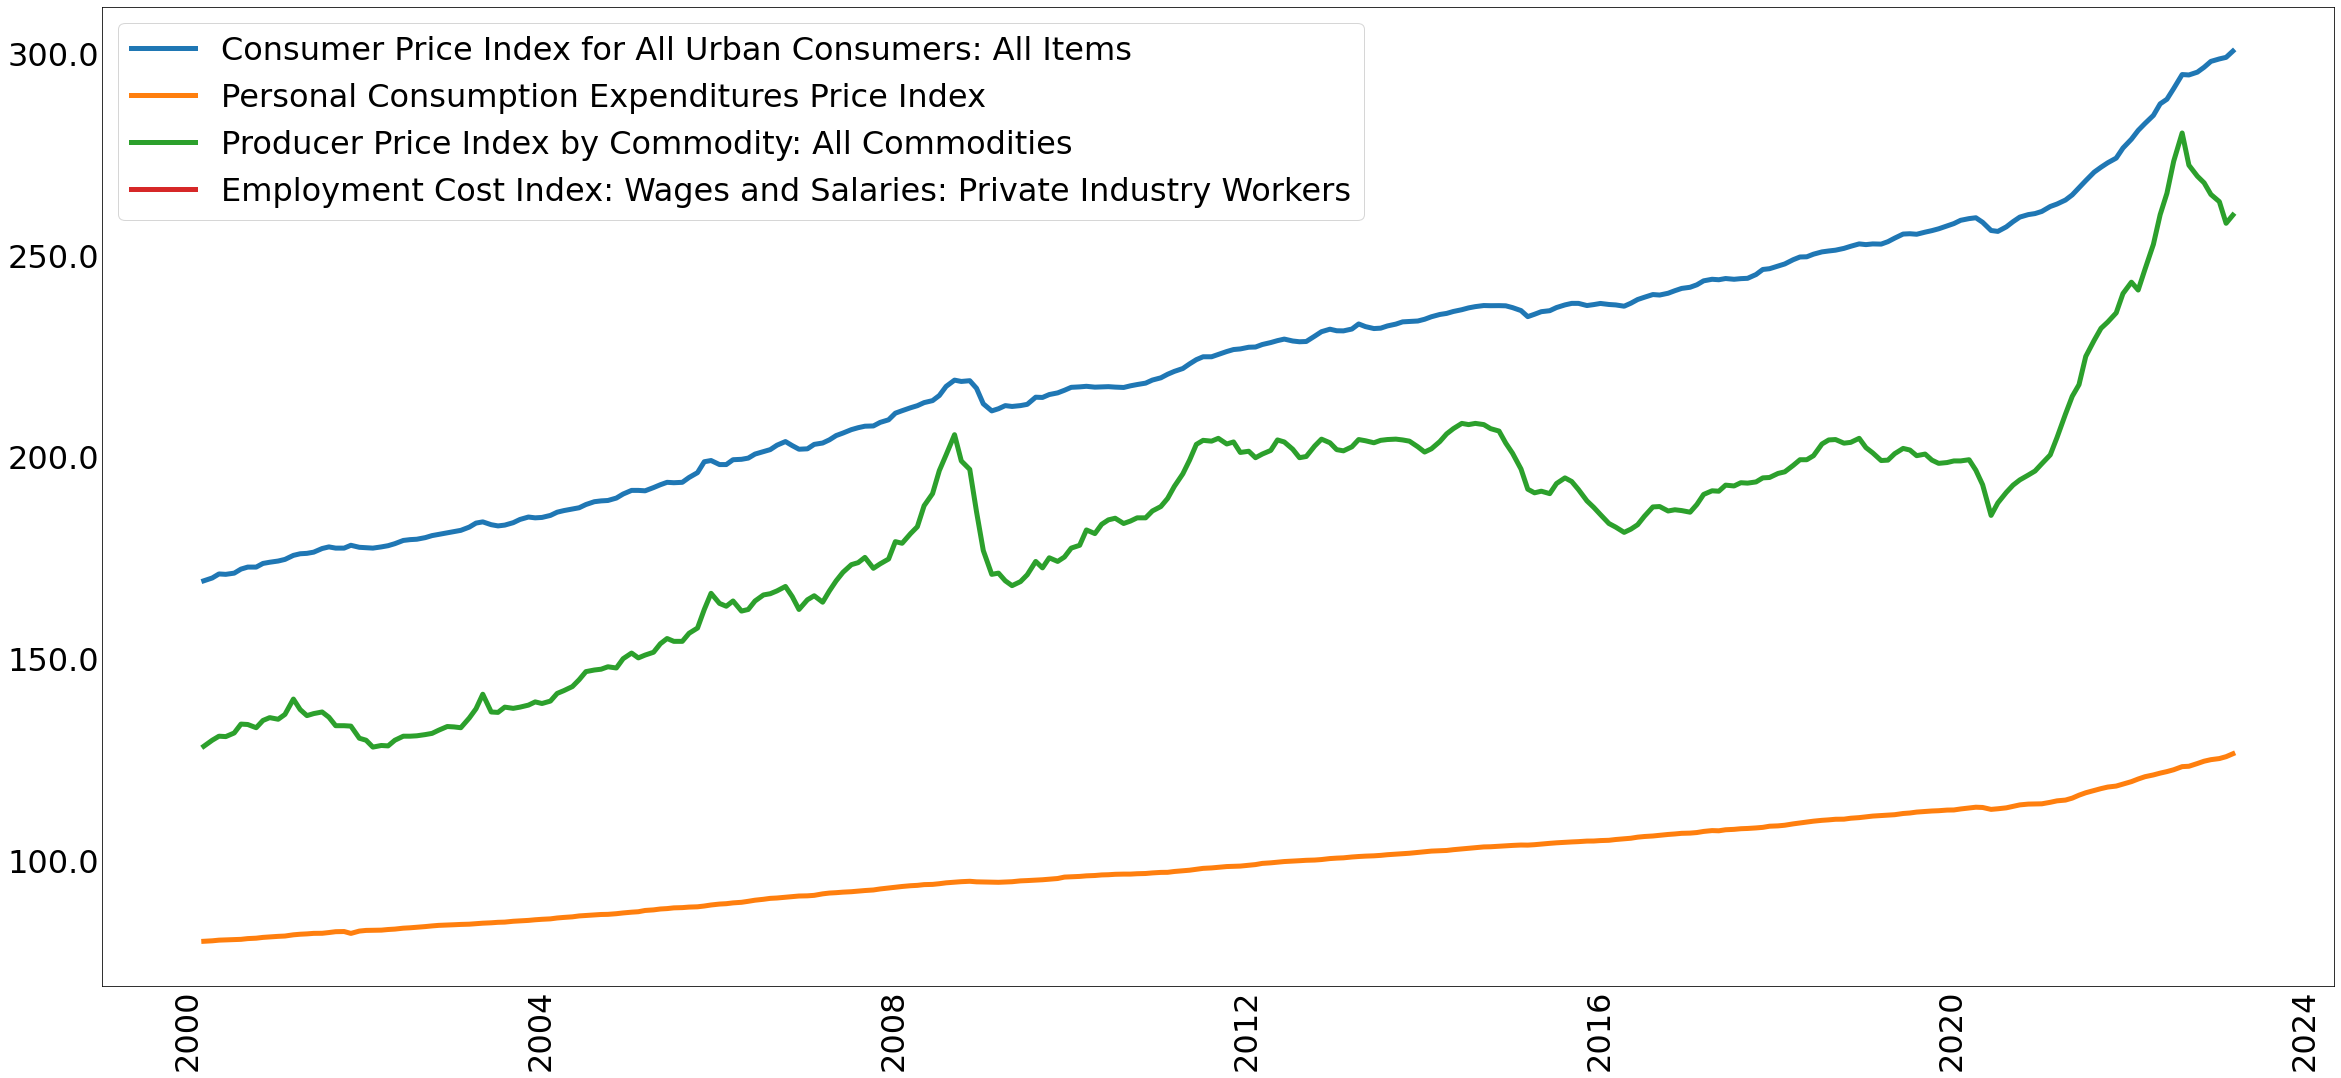

In [50]:
import os
def plot_lines(df,
              linewidth = 5,
              figsize = (40, 20),
              secondary_y = None,
              legend = True,
              pp = None,
              save_fig = True,
              global_fontsize = 32):
    plt.rcParams.update({"font.size":global_fontsize})
    fig, ax = plt.subplots(figsize = figsize)
    df.dropna(axis = 0, how = "all").plot.line(
        linewidth = linewidth,
        ax = ax,
        secondary_y = secondary_y,
        legend = legend)
    
    ax.set_xlabel("")
    ax.tick_params(axis = "x", rotation = 90)
    ax.tick_params(length = 0, which = 'both')
    y_vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in y_vals])
    
    return fig, ax

plot_data = data[["Consumer Price Index for All Urban Consumers: All Items", "Personal Consumption Expenditures Price Index", "Producer Price Index by Commodity: All Commodities",
                "Employment Cost Index: Wages and Salaries: Private Industry Workers"]]
fig, ax = plot_lines(plot_data)


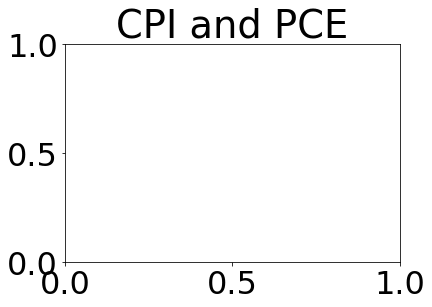

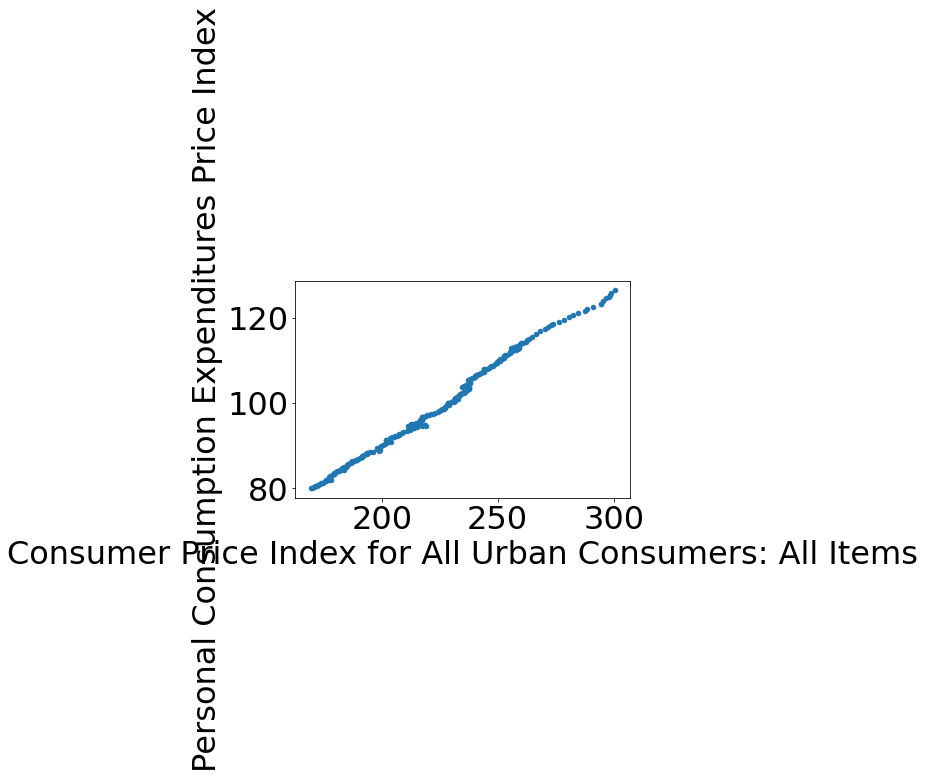

In [37]:
infla_vars = ["Consumer Price Index for All Urban Consumers: All Items",
              "Personal Consumption Expenditures Price Index"]
df = data[infla_vars]
plt.title("CPI and PCE")
ax = df.plot.scatter(x = "Consumer Price Index for All Urban Consumers: All Items", y = "Personal Consumption Expenditures Price Index")


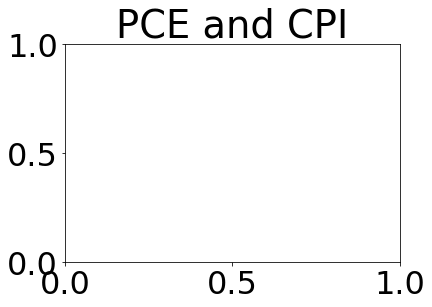

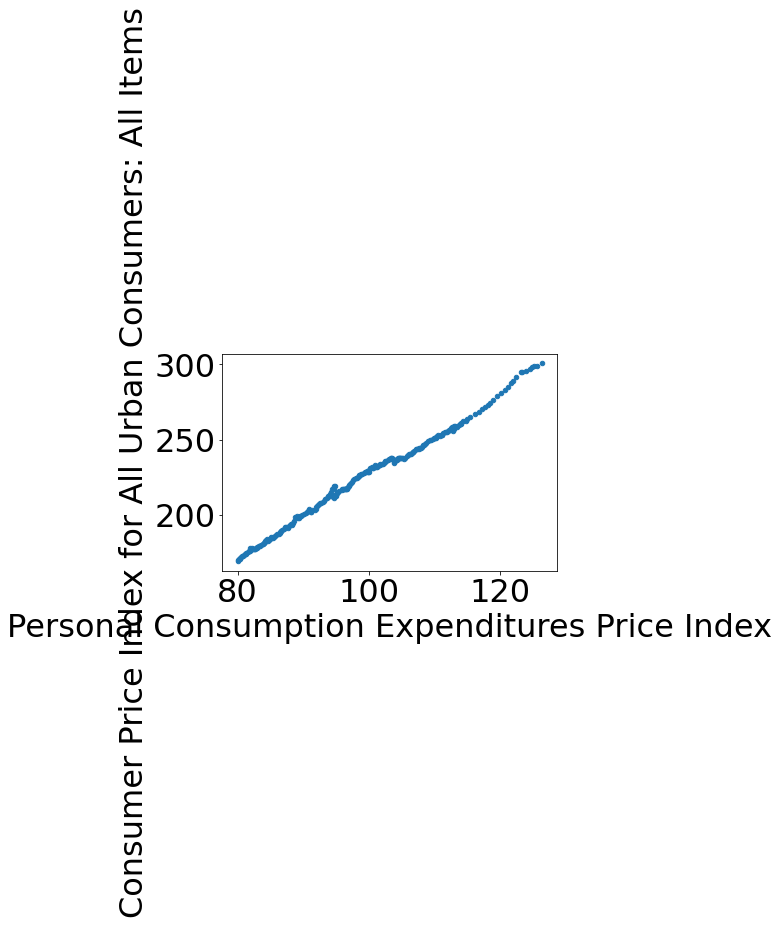

In [38]:
infla_vars = ["Consumer Price Index for All Urban Consumers: All Items",
              "Personal Consumption Expenditures Price Index"]
df = data[infla_vars]
plt.title("PCE and CPI")
ax = df.plot.scatter(x = "Personal Consumption Expenditures Price Index", y = "Consumer Price Index for All Urban Consumers: All Items")


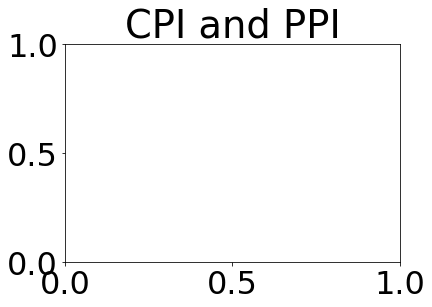

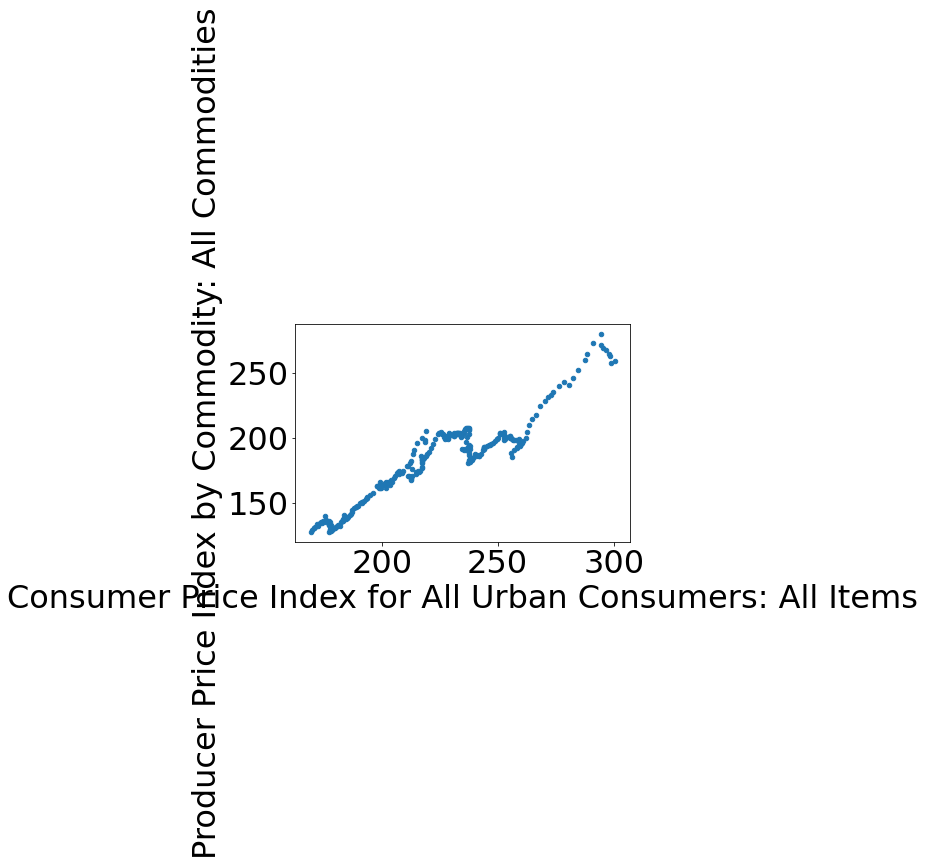

In [39]:
infla_vars = ["Consumer Price Index for All Urban Consumers: All Items",
              "Producer Price Index by Commodity: All Commodities"]
df = data[infla_vars]
plt.title("CPI and PPI")
ax = df.plot.scatter(x = "Consumer Price Index for All Urban Consumers: All Items", y = "Producer Price Index by Commodity: All Commodities")


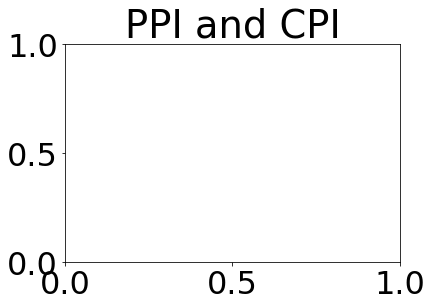

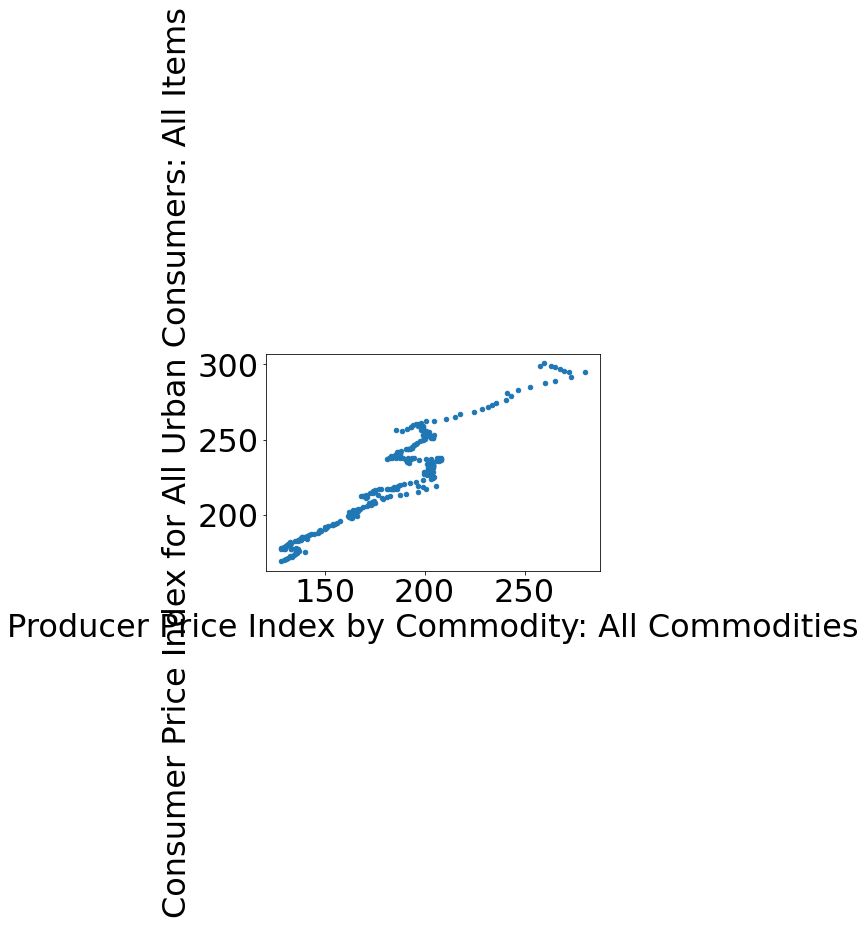

In [40]:
infla_vars = ["Consumer Price Index for All Urban Consumers: All Items",
              "Producer Price Index by Commodity: All Commodities"]
df = data[infla_vars]
plt.title("PPI and CPI")
ax = df.plot.scatter(x = "Producer Price Index by Commodity: All Commodities", y = "Consumer Price Index for All Urban Consumers: All Items")


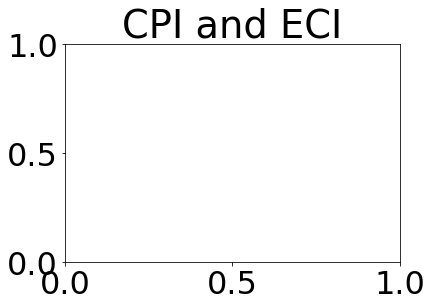

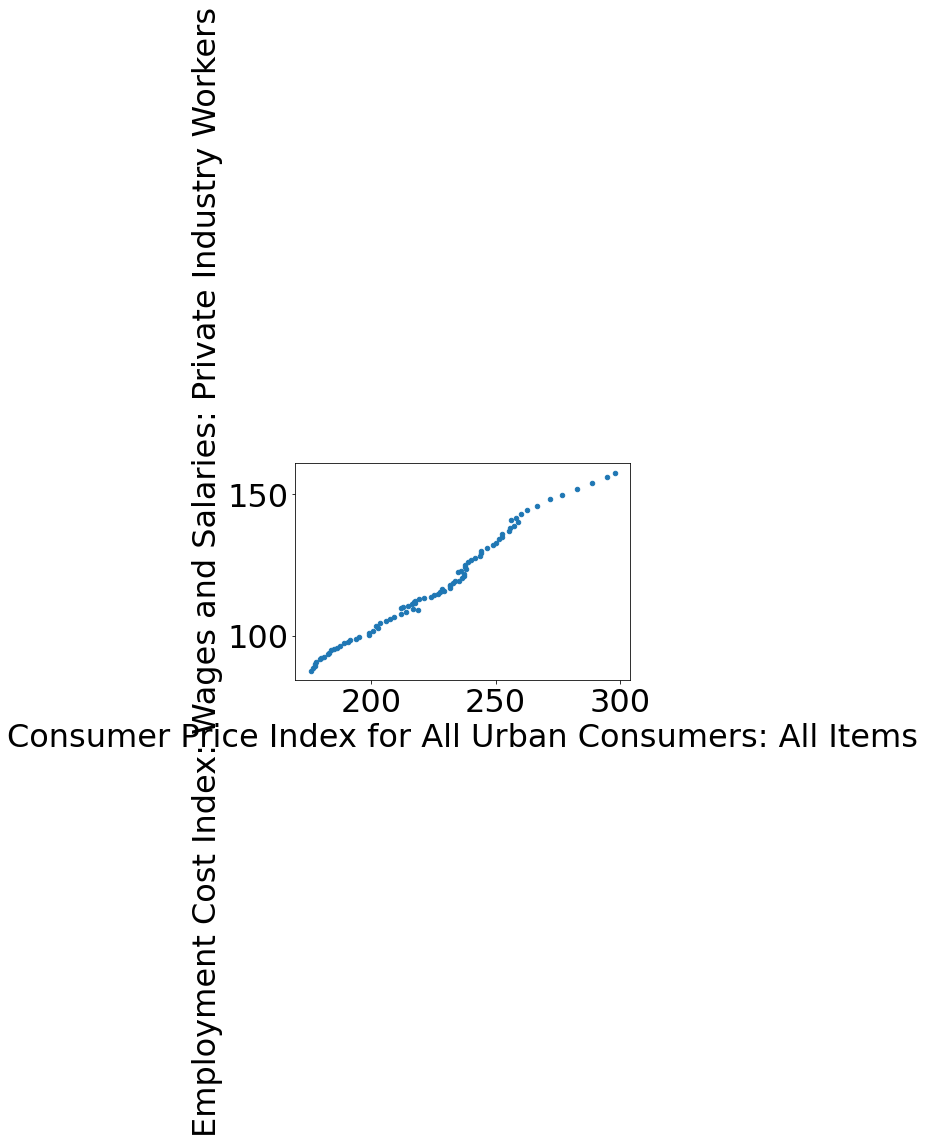

In [41]:
infla_vars = ["Consumer Price Index for All Urban Consumers: All Items",
              "Employment Cost Index: Wages and Salaries: Private Industry Workers"]
df = data[infla_vars]
plt.title("CPI and ECI")
ax = df.plot.scatter(x = "Consumer Price Index for All Urban Consumers: All Items", y = "Employment Cost Index: Wages and Salaries: Private Industry Workers")


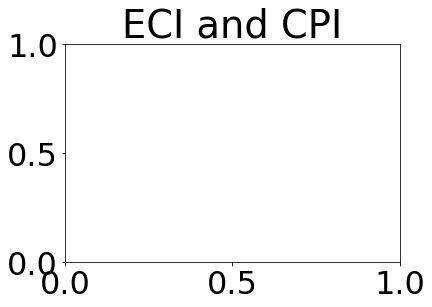

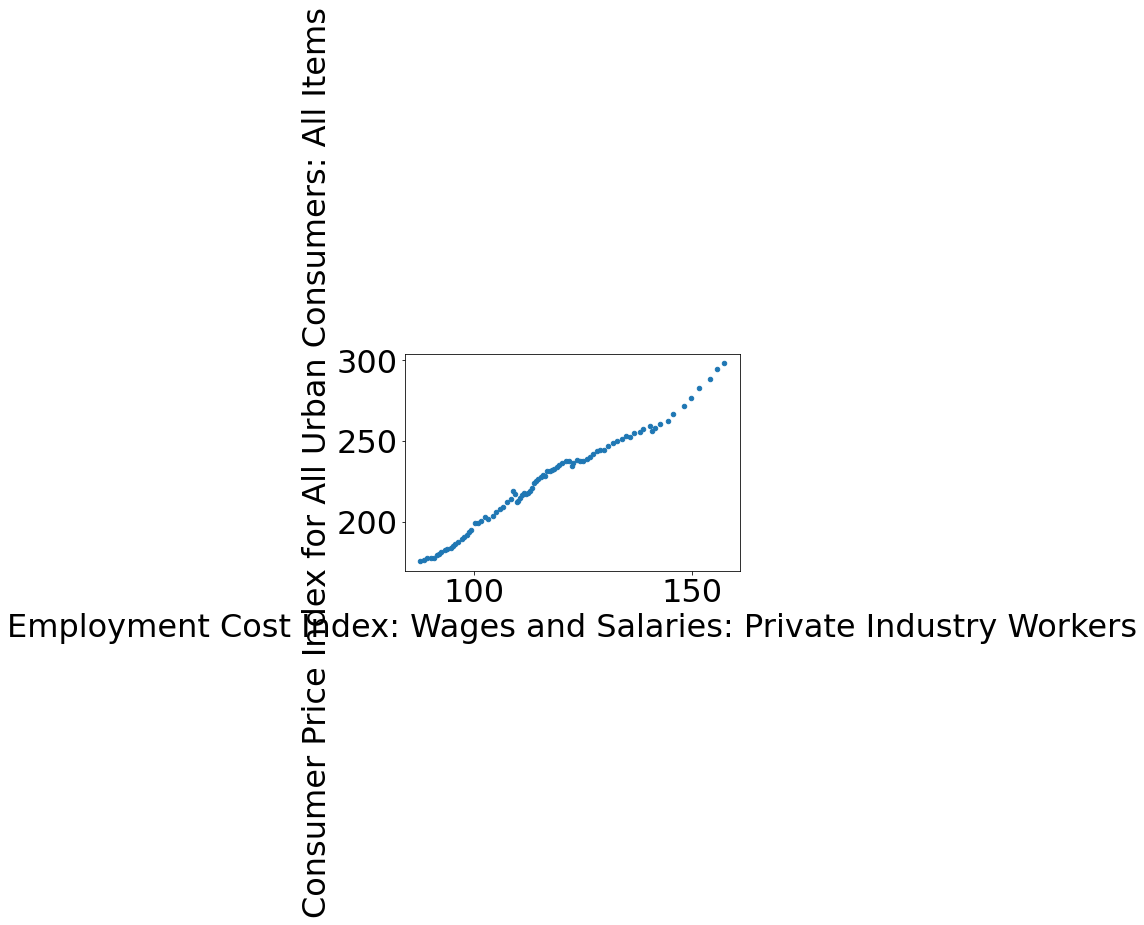

In [42]:
infla_vars = ["Consumer Price Index for All Urban Consumers: All Items",
              "Employment Cost Index: Wages and Salaries: Private Industry Workers"]
df = data[infla_vars]
plt.title("ECI and CPI")
ax = df.plot.scatter(x = "Employment Cost Index: Wages and Salaries: Private Industry Workers", y = "Consumer Price Index for All Urban Consumers: All Items")


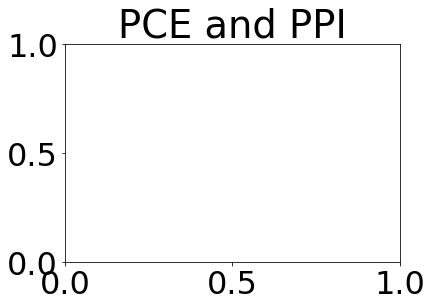

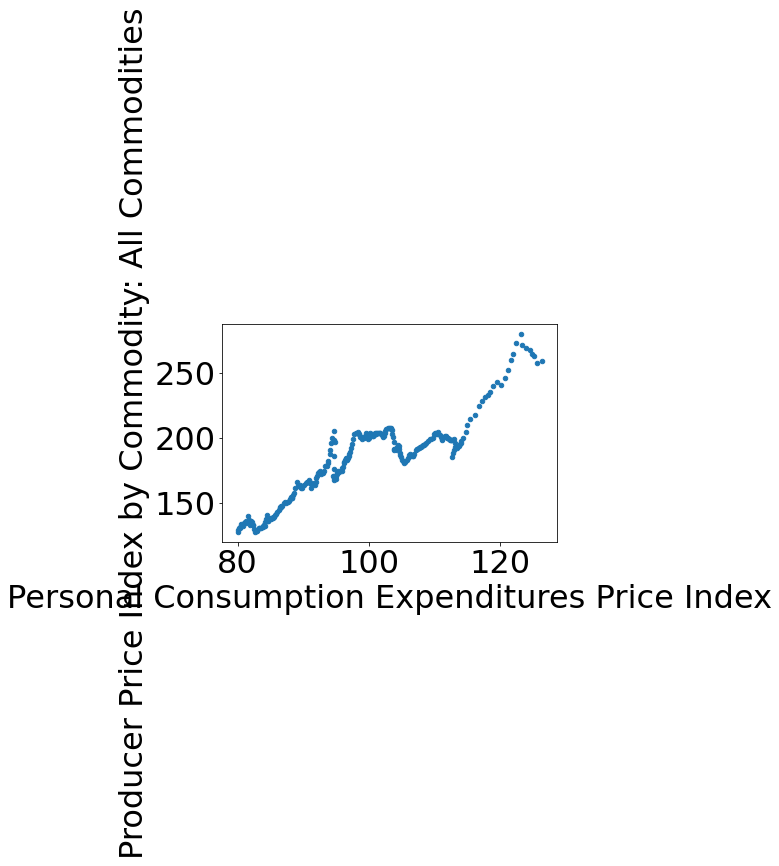

In [43]:
infla_vars = ["Personal Consumption Expenditures Price Index", 
              "Producer Price Index by Commodity: All Commodities"]
df = data[infla_vars]
plt.title("PCE and PPI")
ax = df.plot.scatter(x = "Personal Consumption Expenditures Price Index",
                    y = "Producer Price Index by Commodity: All Commodities")

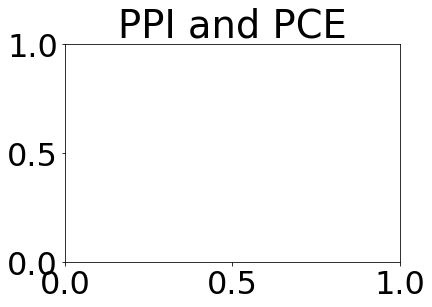

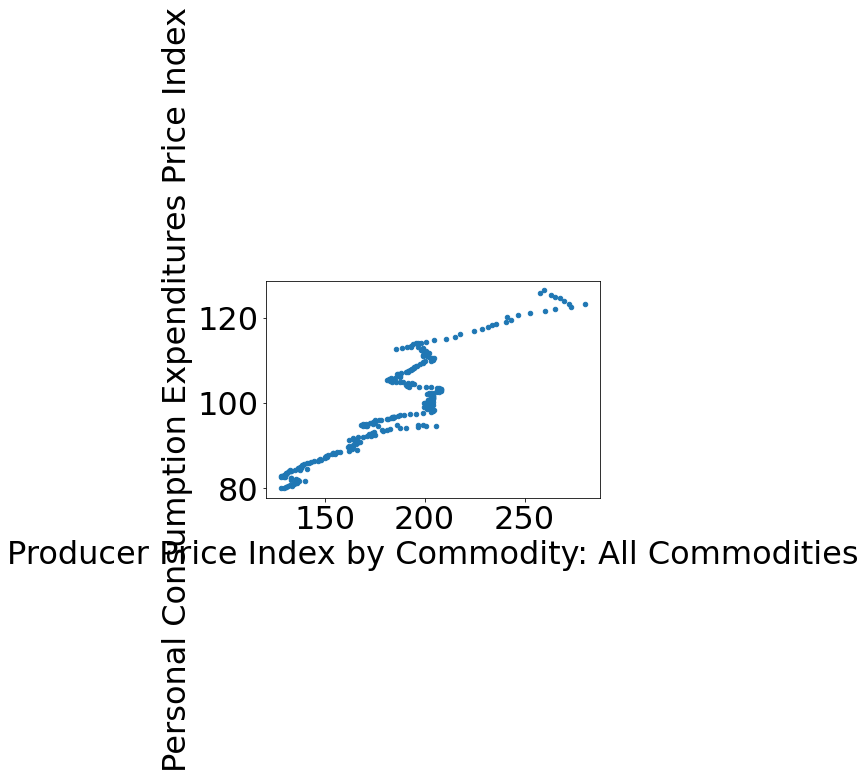

In [44]:
infla_vars = ["Personal Consumption Expenditures Price Index", 
              "Producer Price Index by Commodity: All Commodities"]
df = data[infla_vars]
plt.title("PPI and PCE")
ax = df.plot.scatter(y = "Personal Consumption Expenditures Price Index",
                    x = "Producer Price Index by Commodity: All Commodities")

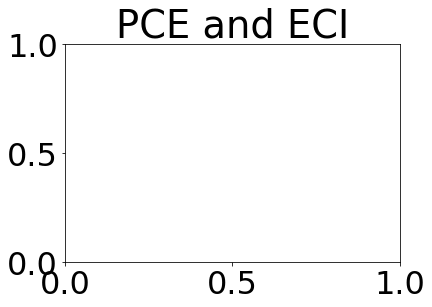

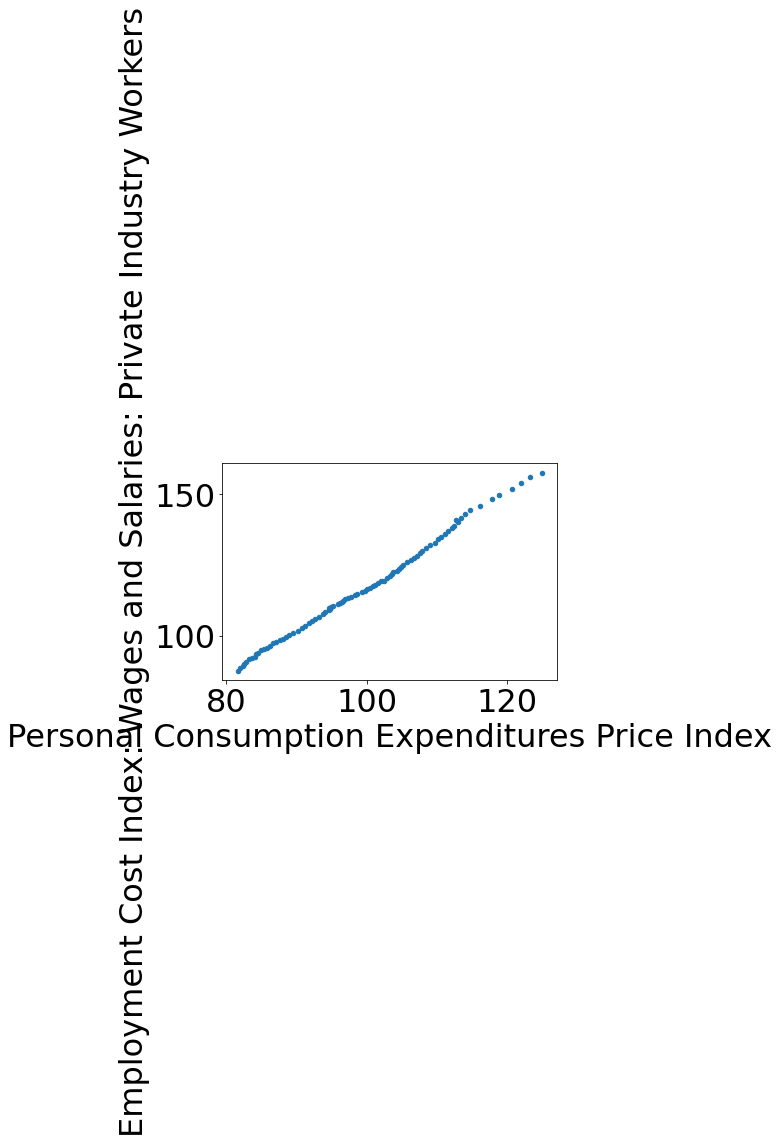

In [46]:
infla_vars = ["Personal Consumption Expenditures Price Index",
              "Employment Cost Index: Wages and Salaries: Private Industry Workers"]
df = data[infla_vars]
plt.title("PCE and ECI")
ax = df.plot.scatter(x = "Personal Consumption Expenditures Price Index",
                    y = "Employment Cost Index: Wages and Salaries: Private Industry Workers")

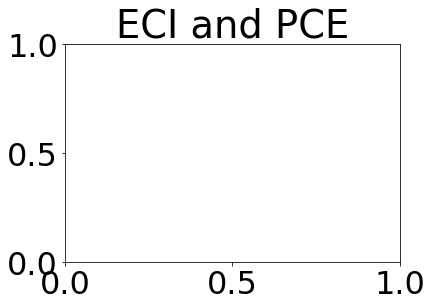

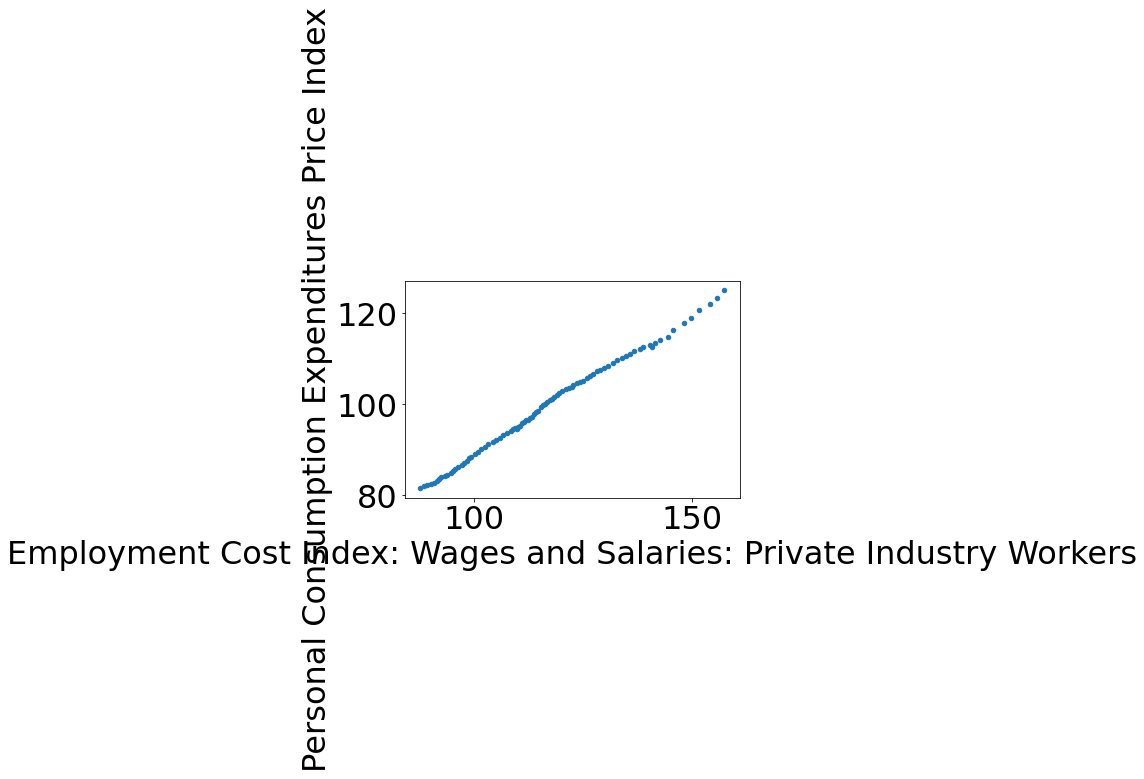

In [47]:
infla_vars = ["Personal Consumption Expenditures Price Index",
              "Employment Cost Index: Wages and Salaries: Private Industry Workers"]
df = data[infla_vars]
plt.title("ECI and PCE")
ax = df.plot.scatter(y = "Personal Consumption Expenditures Price Index",
                    x = "Employment Cost Index: Wages and Salaries: Private Industry Workers")

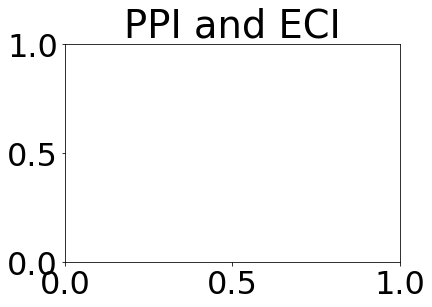

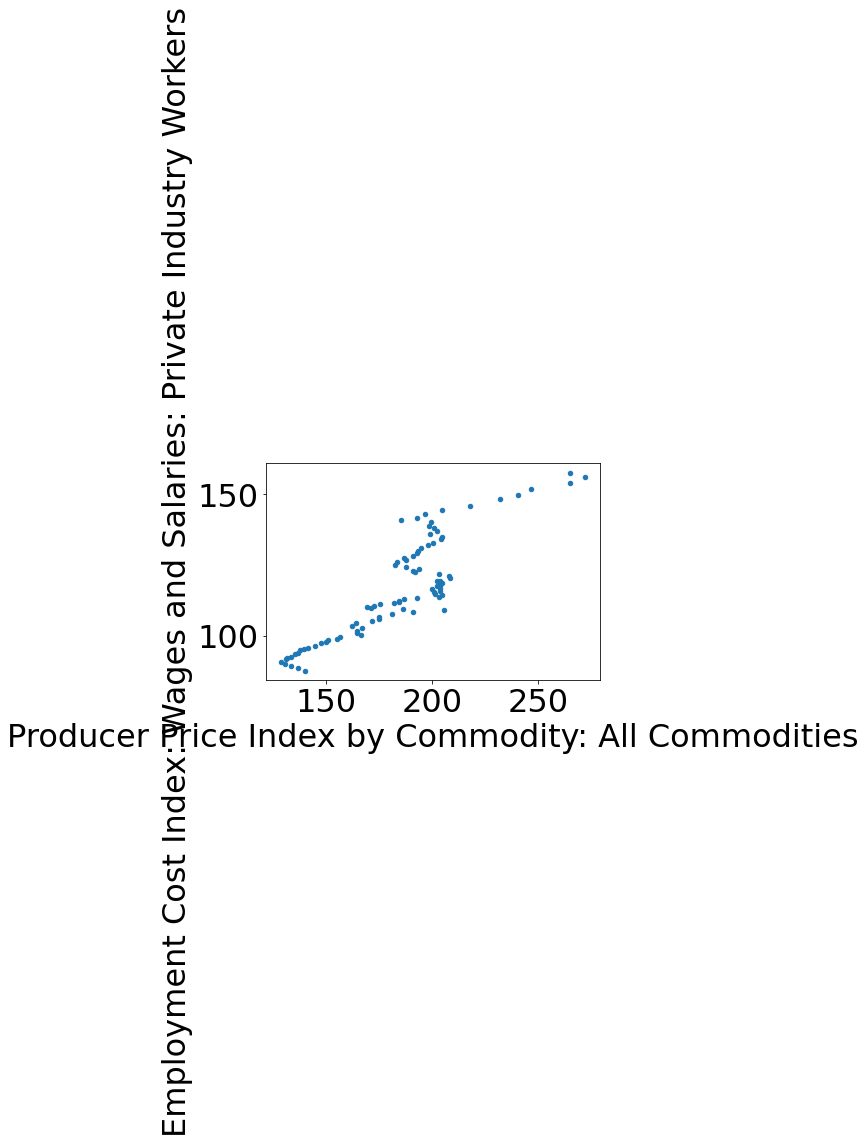

In [48]:
infla_vars = ["Producer Price Index by Commodity: All Commodities",
              "Employment Cost Index: Wages and Salaries: Private Industry Workers"]
df = data[infla_vars]
plt.title("PPI and ECI")
ax = df.plot.scatter(x = "Producer Price Index by Commodity: All Commodities",
                    y = "Employment Cost Index: Wages and Salaries: Private Industry Workers")

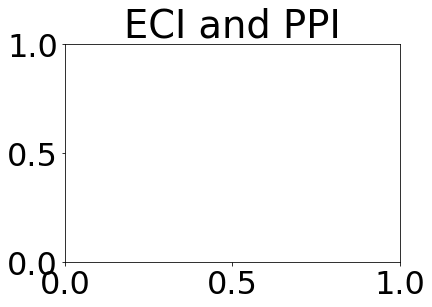

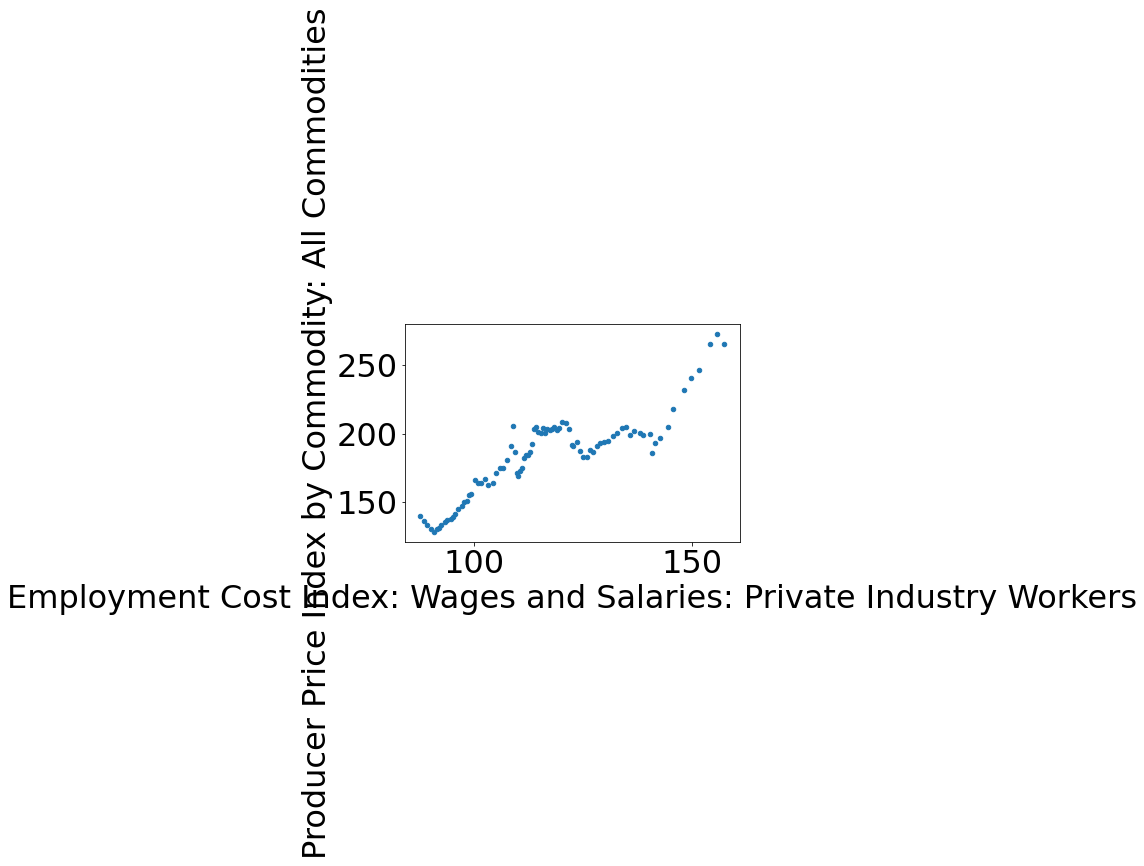

In [49]:
infla_vars = ["Producer Price Index by Commodity: All Commodities",
              "Employment Cost Index: Wages and Salaries: Private Industry Workers"]
df = data[infla_vars]
plt.title("ECI and PPI")
ax = df.plot.scatter(y = "Producer Price Index by Commodity: All Commodities",
                    x = "Employment Cost Index: Wages and Salaries: Private Industry Workers")

CPI, PCE, PPI, and ECI are all various measures for inflation. CPI is the most common method of measuring inflation because it provides information on the price changes that occur in the economy. This is a measurement that considers the day-to-day living expenses the population. PPI seperates itself from CPI by measuring prices from a specific day rather than considering the prices throughout the month. PPI also excludes excise and sales taxes from price measurement while CPI includes them. When looking at CPI and PPI in the visualizations above, we can see that they have a weaker relationship with each other than with some of the other measures. PCE as a measure for inflation considers current household consumption rather than saving for future consumption. PCE accounts for benchmark years as the sum of detailed goods and services purchased by people. PCE and ECI look to have a strong relationship with each other. ECI views inflation through the scope of the price of labor, this measure also includes employee benefits. Overall, these measures of inflation generally have a positive relationship but it is interesting to see the strength of all them. 

# Question 2

Create a correlation matrix for quarterly observations of Nominal GDP, Real GDP, the Price Level (CPI or GDP Deflator), the quantity of currency in circulation and the federal funds rate for as large of a date range as possible. Then, calculate the year-over-year percent change for each each variable and save the results as variables in the same dataframe. Create a correlation matrix for these new variables.

How has the correlation between each variable changed? Why do you think the correlation changes after calculate the year-over-year percent change?

In [86]:
def gather_data(data_codes,
               start,
               end = datetime.datetime.today(),
               freq = "Q"):
    df_init = False
    #dct.items() calls for key and value that key points to
    for key, code in data_codes.items():
        if df_init == False:
            df = web.DataReader(code, "fred", start, end).resample(freq).mean()  
            df.rename(columns  = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
    
    return df

In [87]:
data_codes = {"Consumer Price Index for All Urban Consumers: All Items": "CPIAUCSL",
             "Nominal Gross Domestic Product for United States": "NGDPSAXDCUSQ",
              "Real Gross Domestic Product": "GDPC1",
              "Monetary Base, Currency in Circulation": "MBCURRCIR",
              "Federal Funds Effective Rate": "DFF"}


start = datetime.datetime(1960, 1, 1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                  freq = "Q")

In [88]:
df = pd.DataFrame(data[data_codes])
df

,Consumer Price Index for All Urban Consumers: All Items,Nominal Gross Domestic Product for United States,Real Gross Domestic Product,"Monetary Base, Currency in Circulation",Federal Funds Effective Rate
DATE,,,,,
1960-03-31,29.396667,135662.0,3277.847,3.183333e+04,3.931319
1960-06-30,29.573333,135270.0,3260.177,3.186667e+04,3.695055
1960-09-30,29.590000,136401.0,3276.133,3.220000e+04,2.937500
1960-12-31,29.780000,135049.3,3234.087,3.263333e+04,2.296196
1961-03-31,29.840000,136254.5,3255.914,3.206667e+04,1.987556
...,...,...,...,...,...
2022-03-31,284.893667,6185120.0,19924.088,2.242633e+06,0.121444
2022-06-30,291.535667,6312119.0,19895.271,2.273767e+06,0.766813
2022-09-30,295.495667,6415822.3,20054.663,2.278067e+06,2.182935


In [89]:
df.pct_change()

,Consumer Price Index for All Urban Consumers: All Items,Nominal Gross Domestic Product for United States,Real Gross Domestic Product,"Monetary Base, Currency in Circulation",Federal Funds Effective Rate
DATE,,,,,
1960-03-31,NaN,NaN,NaN,NaN,NaN
1960-06-30,0.006010,-0.002890,-0.005391,0.001047,-0.060098
1960-09-30,0.000564,0.008361,0.004894,0.010460,-0.205019
1960-12-31,0.006421,-0.009910,-0.012834,0.013458,-0.218316
1961-03-31,0.002015,0.008924,0.006749,-0.017365,-0.134414
...,...,...,...,...,...
2022-03-31,0.022199,0.016073,-0.004103,0.012933,0.528439
2022-06-30,0.023314,0.020533,-0.001446,0.013882,5.314107
2022-09-30,0.013583,0.016429,0.008012,0.001891,1.846762


In [90]:
df["CPIpc"] = df["Consumer Price Index for All Urban Consumers: All Items"].pct_change()
df["NGDPpc"] = df["Nominal Gross Domestic Product for United States"].pct_change()
df["RGDPpc"] = df["Real Gross Domestic Product"].pct_change()
df["MBCCpc"] = df["Monetary Base, Currency in Circulation"].pct_change()
df["FFERpc"] = df["Federal Funds Effective Rate"].pct_change()

In [91]:
df

,Consumer Price Index for All Urban Consumers: All Items,Nominal Gross Domestic Product for United States,Real Gross Domestic Product,"Monetary Base, Currency in Circulation",Federal Funds Effective Rate,CPIpc,NGDPpc,RGDPpc,MBCCpc,FFERpc
DATE,,,,,,,,,,
1960-03-31,29.396667,135662.0,3277.847,3.183333e+04,3.931319,NaN,NaN,NaN,NaN,NaN
1960-06-30,29.573333,135270.0,3260.177,3.186667e+04,3.695055,0.006010,-0.002890,-0.005391,0.001047,-0.060098
1960-09-30,29.590000,136401.0,3276.133,3.220000e+04,2.937500,0.000564,0.008361,0.004894,0.010460,-0.205019
1960-12-31,29.780000,135049.3,3234.087,3.263333e+04,2.296196,0.006421,-0.009910,-0.012834,0.013458,-0.218316
1961-03-31,29.840000,136254.5,3255.914,3.206667e+04,1.987556,0.002015,0.008924,0.006749,-0.017365,-0.134414
...,...,...,...,...,...,...,...,...,...,...
2022-03-31,284.893667,6185120.0,19924.088,2.242633e+06,0.121444,0.022199,0.016073,-0.004103,0.012933,0.528439
2022-06-30,291.535667,6312119.0,19895.271,2.273767e+06,0.766813,0.023314,0.020533,-0.001446,0.013882,5.314107
2022-09-30,295.495667,6415822.3,20054.663,2.278067e+06,2.182935,0.013583,0.016429,0.008012,0.001891,1.846762


In [92]:
corr_matrix = df.corr()
print(corr_matrix)

                                                    Consumer Price Index for All Urban Consumers: All Items  \
Consumer Price Index for All Urban Consumers: A...                                           1.000000         
Nominal Gross Domestic Product for United States                                             0.976825         
Real Gross Domestic Product                                                                  0.992300         
Monetary Base, Currency in Circulation                                                       0.914055         
Federal Funds Effective Rate                                                                -0.543980         
CPIpc                                                                                       -0.289358         
NGDPpc                                                                                      -0.319276         
RGDPpc                                                                                      -0.152583         
M

The correlation matrix above shows the Quantity Theory of Money. It is defined as the equation MV = PT. M is the supply of money which can be represented by the Monetary Base in Circulation. MBCC shows a strong positive relationship with NGDP, RGDP, and CPI. M shows a weaker negative relationships with FFED. V is the velocity of money in circulation. The velocity of money is a ratio of NGDP over MBCC which can be used to gauge the economy’s strength or people’s willingness to spend money. NGDP had a strong positive relationship with RGDP, CPI, and MBCC. P is the price level, which is measured by CPI which deflates consumer dollar. This means that when prices increase there is a loss of purchasing power. T is the volume of goods and services produced which can be measured by GDP. 


